# Identity, similarity and distance measures

## Literature
* <http://nlp.ffzg.hr/data/publications/nljubesi/ljubesic08-comparing.pdf> Overzichtelijk artikel waarin een aantal maten worden beschereven en toegepast op een dataset, en daarna vergeleken.

## Inhoud
1. Wanneer zijn twee objecten "hetzelfde"?
2. Eigenschappen van similariteit en afstands maten
3. Similariteit van verzamelingen
4. van vectoren
5. van kans distributies

## Quine: "no entity without identity"
* Als je een wetenschappelijke theorie ontwikkeld, 
* mag je alleen objecten (entiteiten) invoeren,
* als je ook exact aangeeft wanneer 2 entiteiten _binnen jouw theorie_ **hetzelfde** zijn.

### Voorbeeld 1: trigonometrie
* De theorie van driehoeken.
* Twee driehoeken zijn hetzelfde als ze _congruent_ zijn.
*  Twee figuren zijn congruent als zij na een geschikte verplaatsing precies op elkaar passen. 
* **Congruente figuren hebben alle eigenschappen gemeen.**
* De driehoeken ABC en A'B'C' zijn congruent, notatie  $ABC \cong A'B'C'$, dan en slechts dan als hun drie paar overeenkomstige zijden even lang zijn: AB=A'B', AC=A'C' en BC=B'C'.
* <http://nl.wikipedia.org/wiki/Congruentie_%28meetkunde%29>

### Voorbeeld 2: netwerk analyse
* _Wanneer zijn twee sociale netwerken hetzelfde?_

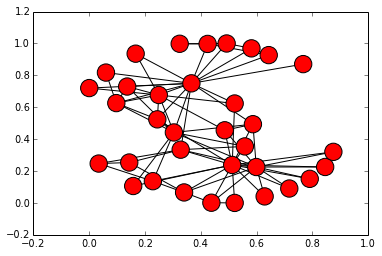

In [279]:
import networkx as nx
%matplotlib inline

g = nx.karate_club_graph()
nx.draw_networkx(g, with_labels=False) 

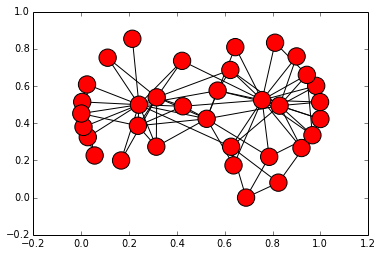

In [280]:
nx.draw_networkx(g, with_labels=False)

### Voorbeeld 2: netwerk analyse
* _Wanneer zijn twee sociale netwerken hetzelfde?_
* Binnen netwerk analyse gaat het om de **structuur**, niet om de individuele gevallen.
* Het maakt dus niet uit hoe de knopen heten, of hoe het plaatje eruit ziet.
* *Twee netwerken zijn hetzelfde als ze **isomorf** zijn.*
    * Dat betekent dat er een functie $f$ is die elke knoop in het ene met exact 1 knoop in het andere netwerk verbindt, zo dat
    * voor alle knopen $x,y$ geldt:
        * $x$ en $y$ zijn verbonden precies dan en dan alleen als $f(x) $ en $f(y)$ verbonden zijn.

### Voorbeeld 3: twee steekproeven

* Je hebt twee metingen gedaan op dezelfde populatie.
* Je vindt verschillende waardes (voor het gemiddelde bijvoorbeeld).
* Wanneer kan je nou zeggen dat die waardes echt verschillend zijn (of dat het door toeval komt)?

#### T-toets

* Je gaat bekijken hoe waarschijnlijk het is dat je deze waardes hebt gevonden
* **terwijl er in het echt geen verschil is**. 
* Dit is je nul-hypothese (H0).
* Als die waarschijnlijkheid (_p waarde_) kleiner is dan .05 (of vaak ook .01),
    * verwerp je H0
    * en geloof je dus dat de verschillen **echt zijn**.

### Soort toetsen
* Student T toets
* Fisher exact toets


## Voorbeeld: verschil in woordgebruik tussen mannen en vrouwen

* In ons onderzoek naar het verschil in woordgebruik op Wikipedia paginas over mannen en vrouwen gebruikten we 
_Fisher exact toets_. 
* Wij vonden bijvoorbeeld dat paginas over vrouwen **significant 5 keer vaker** een link naar hun **spouse** in de infobox hadden dan mannen. En bijna 3 keer vaker naar hun **parent**.
* Hier een voorbeeld dataset:

```
               Men  Women Row total
 Dieting	     1	9	10
Non-dieting  	11	3	14
Column total	12	12	24
```

#### Vraag: Doen vrouwen vaker een dieet dan mannen?

* Antwoord op basis van Fisher test: Ja.
* Zie <https://en.wikipedia.org/wiki/Fisher%27s_exact_test#Example>


## Gelijkheid, hetzelfde en  similariteit in de praktijk

* Ga voor jezelf na:
    * in wat voor gevallen spelen deze begrippen een rol?
    * Verzin een goed voorbeeld, en bepaal 
        * "hoeveel 2 dingen mogen verschillen om toch nog hetzelfde te zijn".

1. Nakijken van een opdracht: is wat jullie gemaakt hebben _hetzelfde_ als het model antwoord?
    * Wanneer zijn twee Python programmas hetzelfde? 

1. Plagiaat: wanneer zijn 2 teksten hetzelfde?

1. Als ze dezelfde woorden bevatten?
1. Moet het  in dezelfde volgorde?
1. Of mag ik ze lowercasen, en stopwoorden verwijderen?
1. Of ook lemmatizeren?
1. Gaat het alleen om de woorden of ook om het aantal keer dat woorden voorkomen? (_set of words_ versus _bag of words_)

1. Zoekmachine: similariteit tussen de zoekvraag en documenten

1. Netflix en spotify aanbevelingen
    * bepaal wie er heel erg op jou lijkt
    * wat die mensen te gek vinden, vindt jij dan vast ook te gek
    * beveel dat dan aan.

## Similariteit en afstand

* Meestal is alleen een maat voor _precies hetzelfde_ niet voldoende.
* Je wilt een maat voor **similariteit**
    * Maat is een getal dat aangeeft hoe veel 2 objecten op elkaar lijken.
    * Maat is _symmetrisch_
    * Maat is maximaal voor objecten die hetzelfde zijn.
    

* De _tegenhanger_ van similariteit is **afstand**.
* Van een afstands (distance) maat wil je dat het een _"metric"_ is:
    * $d: X\times X \mapsto \mathbb{R}$
    * symmetrisch
    * nooit negatief
    * $d(x,y)=0$ precies dan als $x=y$
    *   "triangle inequality" 
        * $d(x,z)\leq d(x,y) + d(y,z)$

### Euclidische afstand 

* De meest intuitieve afstand in het 2 dimensionale vlak.
* Lengte van de rechte lijn tussen 2 punten.
* Makkelijk te zien dat dit een _metric_ is.
* De afstand tussen (0,0) en het punt   met coordinaten $(x,y)$   

* is    
    * met de stelling van Pythagoras
    * $\sqrt(x^2 +y^2)$

<img src='http://rosalind.info/media/Euclidean_distance.png'/>

#### Jullie: geef een voorbeeld van een afstand dat geen metric is

* Definieer $heel\_ver(x,y) = 1$ als $x$ en $y$ minstens een kilometer uit elkaar liggen , en 0 anders.

## Verschillende afstandsmaten
* Voor verschillende soorten objecten zijn er verschillende afstandsmaten.
* Vaak lijken ze erg op elkaar.
* We kijken naar 
    1. verzamelingen (of bit vectoren)
    2. vectoren van integers of reals
    3. waarschijnlijkheids distributies (vectoren van kansen)

## Verzamelingen
 
 * We meten dan de _mate van overlap_.
 * We willen normaliseren voor de grootte van de verzamelingen:
     * Tussen $\{a,b\}$ en $\{b,c\}$ is minder overlap dan tussen $\{b\}$ en $\{a,b\}$.
 * Jaccard afstand
 <img src='http://upload.wikimedia.org/math/1/8/6/186c7f4e83da32e889d606140fae25a0.png'/>
 * In Python: `len(A&B) / len(A|B) `
 * Eigenschappen
     * symmetrisch
     * Tussen 0 en 1. 
         * 0: geen overlap
         * 1: dezelfde verzameling
 

### Meer Jaccard 

#### Distance
* Simpelweg $1-J(A,B)$.

#### Generalisatie naar vectoren van reals: minmax similariteit

<img src='http://upload.wikimedia.org/math/2/e/3/2e3dee60608bdac7b5e59184250cd328.png'/>
 
#### Jaccard over bitvectoren. 
<img src='http://upload.wikimedia.org/math/6/7/d/67dee3558dc8eac31dfabef0015c0be4.png'/>

 

## Dot product
* In de teller van Jaccard bepalen we de mate van overlap.
* Als we verzamelingen representeren als bitvectoren over een domein,
* dan bepaal je overlap op deze manier
    * loop simultaan door beide vectoren
    * kijk op elke positie of er in beide een 1 staat: hoog alleen dan je resultaat met 1 op
    * "je vergaart steeds meer bewijs"
    * voor `a` en `b` bitvectoren van dezelfde lengte:
    * `sum(    a[i]*b[i] for i in range(len(a))   ) `
    * Dit heet ook wel het **dot product** van `a` en `b`
        * Notatie $a\cdot b$
        * Python `a.dot(b)`  (in pandas en numpy)



### Dot product in Information retrieval

#### Bepaal de similariteit van een query en een document.

* Beide worden gerepresenteerd als een term-bitvector van lengte $|V|$
    * waar $V$ de verzameling woorden in het hele corpus is.
    * een term $t$ zit in de query precies als $q_i=1$, als $t$ het $i$-de woord in het vocabulair is.
* **Taak** Tel hoeveel woorden in de query ook in het document zitten.

* Dat is dus precies `query_vector.dot(document_vector)`.
* Je kan het dotproduct ook toepassen met integer of real vectoren.
    * Bijvoorbeeld met _bag of words_ vectoren waarin je voor elke term aangeeft _hoe vaak_ die in het document voorkomt.

## Cosine similariteit

* Similariteit tussen 2 vectoren.
* teller is het dot product
* We normaliseren met de "lengte" van de vectoren.
* Voor lengte nemen we gewoon de Euclidische lengte:
    * wortel van de som van de kwadraten
    * In meer dimensies gewoon de generalisatie van de stelling van Pythagoras
    * `sqrt(sum(a*a)))`  voor `a` een numpy array
    
    <img src='http://upload.wikimedia.org/math/f/3/6/f369863aa2814d6e283f859986a1574d.png'/> 

In [281]:
def cosine(A,B):
    return A.cdot(B) / ( (sqrt(sum(A*A))) * sqrt(sum(B*B)) )

## Pearson correlatie
* Doet eigenlijk hetzelfde als de cosine similariteit,
    * maar corrigeert voor het gemiddelde,
    * anders gezegd , pearson correlatie is cosine similariteit op genormaliseerde waardes (= verschil met het gemiddelden)
    
<img src='http://upload.wikimedia.org/math/e/3/c/e3c7ff025788887bba2f3dfca7df94b9.png'/>

 

# Vergelijken van kansverdelingen

# Even opfrissen

* We werken veel met **verschillen**.
* Maar soms zijn de _gemeten verschillen_ erg groot, terwijl _het verschil in betekenis_ best klein is.
* We willen dat verschil "_smoothen_".
* Het logarithme is ideaal voor "_smoothen_".

## Voorbeeld
* $1000-10 = \ldots$
* $\log_{10}(1000) - \log_{10}(10) = \ldots $
* $ \log_{10} \frac{1000}{10} = \ldots $
* $\log_{2}(1000) - \log_{2}(10) = \ldots $

In [4]:
import numpy as np 
print 1000 -10

print np.log10(1000)-np.log10(10)
print np.log10(1000/10)

print np.log2(1000)-np.log2(10)
print np.log2(1000/10)

990
2.0
2.0
6.64385618977
6.64385618977


## Proof using basic algebra

$$
\begin{array}{ll}
\log\frac{x^a}{x^b}&=\\
\log(x^a\cdot x^{-b})&=\\
\log(x^{a-b})& = \\
(a-b)\cdot \log x & = \\
a\log x - b\log x & =\\
\log(x^a) - \log(x^b)
\end{array}
$$



# Pointwise Mutual information


> Pointwise mutual information (PMI),[1] or point mutual information, is a measure of association used in information theory and statistics. In contrast to mutual information (MI) which builds upon PMI, it refers to single events, whereas MI refers to the average of all possible events. 
<https://en.wikipedia.org/wiki/Pointwise_mutual_information>

The PMI of a pair of outcomes x and y belonging to discrete random variables X and Y quantifies the discrepancy between the probability of their coincidence given their joint distribution and their individual distributions, assuming independence. Mathematically:

$$
\operatorname{pmi}(x;y) \equiv \log\frac{p(x,y)}{p(x)p(y)} = \log\frac{p(x|y)}{p(x)} = \log\frac{p(y|x)}{p(y)}.
$$

<!-- <img src="//upload.wikimedia.org/math/9/d/1/9d18fc4cb9188c2628aabdb658ac515b.png"/> -->

# PMI, observed and "expected"

* PMI measures the smoothed difference between _observed_ behavior of $x$ and $y$ and _expected_ behavior of $x$ and $y$ assuming that they are _independent_.
* If $x$ and $y$ are independent then $PMI(x;y)$ equals $\ldots$

## Using PMI to smooth observed counts

$$p(x,y) \cdot \log\frac{p(x,y)}{p(x)p(y)} $$

* Suppose we _estimate_ $P(x,y)$ using counts of cooccurences of $x$ and $y$.
* What is the difference does smoothng make? (from using just  $P(x,y)$)
    * Suppose we use logarithm with base 2.

* **If $x$ and $y$ cooccur twice as much as can be expected, then $\ldots$**
* **If $x$ and $y$ cooccur more than twice as much as can be expected, then**
* **If $x$ and $y$ cooccur less than twice as much as can be expected, then**

# Mutual Information

* <https://en.wikipedia.org/wiki/Mutual_information> 
* And Chapter 13 in <http://nlp.stanford.edu/IR-book/>

* The **mutual information (MI)**  of the random variables X and Y is the  product of $p(x,y)$ and   PMI over all possible outcomes (with respect to the joint distribution p(x,y)).

$$ I(X;Y) = \sum_{y \in Y} \sum_{x \in X}
                 p(x,y) \log{ \left(\frac{p(x,y)}{p(x)\,p(y)}
                              \right) } \,\!$$
                              
* Used as a feature selection method in IR, K-means clustering and text classification.
* See <http://nbviewer.jupyter.org/url/maartenmarx.nl/teaching/ISatWork/NoteBooks/TextClassification-MutualInformation.ipynb>

## Kullback Leibler en Jensen-Shannon divergence

* Manier om twee _probability distributions_ te vergelijken.
* Hoe veel lijken ze op elkaar?
* Wordt veel gebruikt in information retrieval.

### Kullback Leibler   divergence
* Pas op, geen metric! Assymetrisch en zonder triangle inequality.
* Voor discrete waarschijnlijkheids distributies $P$ en $Q$, definieer de "_KL-divergence of $Q$ from $P$_" als 

<img src='http://upload.wikimedia.org/math/e/9/4/e942122df940271c8361f58c2c302ebe.png'/>

* "it is the expectation of the logarithmic difference between the probabilities P and Q, where the expectation is taken using the probabilities P"
* let op: alleen gedefinieerd als $Q_i=0 \Rightarrow P_i=0$. 
* aanname: we zien de log van 0 als 0.

#### Voorbeeld 0
* $P$ en $Q$ zijn hetzelfde.
* Wat was ook alweer $log(1)$?

#### Voorbeeld 1
* $P$ is de distributie van woorden in `Boer zoekt vrouw`.
* $Q$ is de distributie van woorden op de NL televisie.

#### Voorbeeld 2
* $P$ is jouw scriptie
* $Q$ is een scriptie die op het internet staat
    * Stel ze hebben dezelfde woorden met dezelfde distributies:
    * dan is $D_{KL}(P||Q)$ gelijk aan $\ldots$
    * stel jouw scriptie $P$ is een hoofdstuk uit scriptie $Q$, en de andere hoofdstukken gaan over heel andere onderwerpen.

###   Jensen-Shannon divergence

* Symmetrische versie van KL divergentie.
<img src='http://upload.wikimedia.org/math/1/8/0/1801c7002df7f6d65c40d3c7c3818252.png'/>
* waar $M = (P+Q)/2$

#### Voorbeeld: wat is het verschil in taalgebruik tussen Wilders en Rutte?
1. Maak taalmodellen W en R voor beide heren op basis van wat ze zeggen.
2. Maak een _gemiddeld Wilders-Rutte taalgebruik model  $M$_ door voor elk woord $t$ te zeggen dat $M(t)= (W(t)+R(t)) /2$.
    * simpelweg `(W+R)/2` als het numpy of pandas arrays zijn
3. Bereken nu de KL divergentie van $M$ van $R$ en ook voor Wilders.
4. Neem het gemiddelde van beide divergenties.
5. Dat is dan $JS(W,R)$.

#### Eigenschappen
* Als we logarithme met basis 2 gebruiken ligt de maat tussen 0 en 1.
* De wortel van de maat is een metric en heet ook wel de JS-afstand.

# Relatie Mutual information en KL divergence

* Mutual information is precies hetzelfde als de KL divergence tussen $p(x,y)$ en $p(x)\cdot p(y)$.
* Zie ook <https://en.wikipedia.org/wiki/Mutual_information#Relation_to_other_quantities>

# Nu wat code

In [282]:
import pandas as pd
import numpy as np
from math import sqrt
from __future__ import division

## Dot product and Cosine similarity in pandas and numpy

### Dot product

In [283]:
# Pandas
a = pd.Series(range(1,11))
b= pd.Series(range(11,21))

dot_product1 =  a.dot(b)  # pandas way
dot_product2 = (a*b).sum() # using pandas product and sum
dot_product3 = sum(a[i]*b[i] for i in range(len(a)))  # do it yourself

dot_product1,dot_product2,dot_product3

(935, 935, 935)

In [284]:
# Exactly the same in numpy

a=np.array(range(1,11))
b=np.array(range(11,21))

dot_product1 =  a.dot(b)
dot_product2 = (a*b).sum()

dot_product1,dot_product2 

 

(935, 935)

### Cosine similarity

In [285]:
def weight(a):
    return sqrt((a*a).sum())

#test
weight(np.array([3,4]))

def cosine(a,b):
    return a.dot(b) / (weight(a) * weight(b))

# tests (last is cosine of a against the reverse of a)
cosine(a,b), cosine(a,a), cosine(a,a[::-1])

(0.95591229944545708, 1.0000000000000002, 0.57142857142857151)

## Sets, bit vectors, and Jaccard

### Sets

In [286]:
A = {1,2,3,4}
B = {3,4,5,6}

def SetJaccard(A,B):
    return len(A&B)/len(A|B)

A & B, A|B,   SetJaccard(A,B)



({3, 4}, {1, 2, 3, 4, 5, 6}, 0.3333333333333333)

### From sets to bitvectors


    

In [287]:
def set2bitvec(Set,Domain):
    list(Domain).sort()
    return np.array([int(i in Set) for i in Domain])

# test 
set2bitvec({1,2},{0,2,1,3}),set2bitvec({1,2},{0,1,2,3}),set2bitvec({2,1},{0,1,2,3})


(array([0, 1, 1, 0]), array([0, 1, 1, 0]), array([0, 1, 1, 0]))

### Bit vectors

In [288]:
# Create a random n long bit vector
def random_set(n):
    return np.array(  [np.random.randint(2)  for i in range(n)]  )

a,b  = random_set(10), random_set(10)
a,b

(array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0]), array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1]))

In [289]:
# http://en.wikipedia.org/wiki/Jaccard_index#Other_definitions_of_Tanimoto_distance
def jaccard(a,b):
    return a.dot(b) / ((a.sum() + b.sum() ) - a.dot(b))

jaccard(a,a), jaccard(a,b)

(1.0, 0.29999999999999999)

In [290]:
# Note that the following are the same for bit vectors
print (a*b).sum(), a.dot(b)

print a.sum(), (a*a).sum() 

3 3
6 6


### Test if both definitions yield the same result.

In [291]:
SetJaccard(A,B), jaccard(set2bitvec(A,A|B), set2bitvec(B,A|B))

(0.3333333333333333, 0.33333333333333331)

## Pearson correlation

In [292]:
# Trivial in Pandas

# Create two random sequences of length 10
a = pd.Series(np.random.randn(10))
b= pd.Series(np.random.randn(10))
a[:3],b[:3]

(0   -0.940279
 1   -0.645258
 2   -0.837384
 dtype: float64, 0    0.538807
 1    1.529087
 2    1.630733
 dtype: float64)

In [293]:
# Pearson correlation
a.corr(b), b.corr(a)

(-0.15111874477234585, -0.15111874477234585)

In [294]:
#
a.corr(b, method='spearman')

-0.28484848484848485

### Pearson correlation, doing it yourself in numpy

Here is the formula from <http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient>
<img src='http://upload.wikimedia.org/math/e/3/c/e3c7ff025788887bba2f3dfca7df94b9.png'/>

In [295]:
teller= (a -a.mean()).dot(b -b.mean())
noemer= sqrt(sum((a -a.mean())**2)) * sqrt(sum((b -b.mean())**2))
teller/noemer

-0.15111874477234588

### KL en JS divergence

In [296]:
# Create two random sequences of probabilities of length n, 

# See http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample
x = pd.Series(np.random.random_sample(3))
y= pd.Series(np.random.random_sample(3))
x

0    0.611954
1    0.446166
2    0.479944
dtype: float64

In [297]:
def kl(x,y):
    return x.dot(np.log(x/y))

#test
kl(x,x),kl(x,y),kl(y,x)

(0.0, -0.84246865862354647, 1.5241538709567175)

## KL in steps

In [298]:
x=[.5,.499,.001 ]
y=[.25,.5,.25]

KL=0
for i in range(3):
    update= x[i] * np.log(x[i]/y[i])
    print i, x[i],y[i], np.log(x[i]/y[i]), update
    KL += update  
print KL

0 0.5 0.25 0.69314718056 0.34657359028
1 0.499 0.5 -0.00200200267067 -0.000998999332666
2 0.001 0.25 -5.52146091786 -0.00552146091786
0.340053130029


In [299]:
# Effe checken
kl(np.array(x),np.array(y))

0.34005313002944454

## JS divergence

In [300]:
x, y = np.array(x), np.array(y)  # Turn lists into numpy arrays
def js(x,y):
    m = (x+y)/2
    return .5* (kl(x,m) + kl(y,m) )

#test
js(x,x),js(x,y),js(y,x)


(0.0, 0.10496587188173179, 0.10496587188173179)

In [302]:
!ipython nbconvert SimilarityMeasures.ipynb     --to slides --reveal-prefix "http://maartenmarx.nl/reveal.js"

[NbConvertApp] Using existing profile dir: u'/Users/admin/.ipython/profile_default'
[NbConvertApp] Converting notebook SimilarityMeasures.ipynb to slides
[NbConvertApp] Support files will be in SimilarityMeasures_files/
[NbConvertApp] Loaded template slides_reveal.tpl
/Users/admin/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/nbconvert/filters/markdown.py:78: UserWarning: Node.js 0.9.12 or later wasn't found.
Nbconvert will try to use Pandoc instead.
  "Nbconvert will try to use Pandoc instead.")
[NbConvertApp] Writing 346107 bytes to SimilarityMeasures.slides.html


In [307]:

!chmod a+r *

In [308]:
mv SimilarityMeasures.slides.html ../Slides/

In [309]:
ls -l


total 1632
drwxr-xr-x  11 admin  staff     374 Jan 23 21:34 9827cb5086cfab8da092/
-rw-r--r--   1 admin  staff    9515 Jan  8 16:00 ForthTalk2014-01-09.ipynb
-rw-r--r--   1 admin  staff  198610 Jan  8 16:08 ForthTalk2014-01-09.slides.html
drwxr-xr-x   4 admin  staff     136 Jan 16 10:41 NLTK/
-rw-r--r--@  1 admin  staff   90684 Mar  2 14:39 Pandas-Pivot-Table-Explained.ipynb
-rw-r--r--   1 admin  staff  148995 Feb 16 14:57 Pandas.ipynb
-rw-r--r--   1 admin  staff    7484 Jan  8 14:22 PosTaging.ipynb
-rw-r--r--   1 admin  staff  102058 Feb 10 11:52 ReadingFilesFromTheWeb.ipynb
-rw-r--r--   1 admin  staff  132898 Mar 13 14:02 SimilarityMeasures.ipynb
-rw-r--r--   1 admin  staff   49782 Jan 14 09:58 XML2JSONand2SQL.ipynb
-rw-r--r--   1 admin  staff   36451 Jan 12 13:42 all_about_tedx.ipynb
-rw-r--r--   1 admin  staff   16746 Jan  6 09:56 consuming-json-data-from-a-web-service.ipynb
drwxr-xr-x  13 admin  staff     442 Jan 12 18:10 cookbook-code/
drwxr-xr-x   9 admin  staff     306 Jan 12 18